In [2]:
#Importamos las libreias pandas, numpy y matplolib respectivamente 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
#Carga desde un archivo .xlsx sin indice 
df= pd.read_csv('pais Entire home_apt_mex.csv')
df

listing_url  host_since  \
0                    https://www.airbnb.com/rooms/35797  2010-06-28   
1                    https://www.airbnb.com/rooms/44616  2010-08-09   
2                    https://www.airbnb.com/rooms/67703  2011-01-04   
3                    https://www.airbnb.com/rooms/70644  2010-08-24   
4                   https://www.airbnb.com/rooms/107078  2011-04-27   
...                                                 ...         ...   
17358  https://www.airbnb.com/rooms/1251627039124173262  2024-09-22   
17359  https://www.airbnb.com/rooms/1251642490491185216  2024-09-18   
17360  https://www.airbnb.com/rooms/1251769567383709085  2020-11-24   
17361  https://www.airbnb.com/rooms/1251800961446133530  2019-01-20   
17362  https://www.airbnb.com/rooms/1252229157495978163  2013-05-22   

       host_response_time host_response_rate host_acceptance_rate  \
0      a few days or more                 0%                  92%   
1          within an hour               100%                  93%   
2          within an hour                71%                  57%   
3      within a few hours               100%                 100%   
4          within an hour               100%                 100%   
...                   ...                ...                  ...   
17358  a few days or more               100%                  92%   
17359  a few days or more               100%                  92%   
17360  a few days or more               100%                  92%   
17361      within an hour               100%                 100%   
17362      within an hour               100%                 100%   

      host_is_superhost                host_verifications  \
0                     f  ['email', 'phone', 'work_email']   
1                     t  ['email', 'phone', 'work_email']   
2                     t                ['email', 'phone']   
3                     t  ['email', 'phone', 'work_email']   
4                     t                ['email', 'phone']   
...                 ...                               ...   
17358                 f                ['email', 'phone']   
17359                 f                ['email', 'phone']   
17360                 f                         ['phone']   
17361                 t                ['email', 'phone']   
17362                 t                ['email', 'phone']   

      neighbourhood_cleansed       property_type        room_type  ...  \
0      Cuajimalpa de Morelos        Entire villa  Entire home/apt  ...   
1                 Cuauhtémoc         Entire home  Entire home/apt  ...   
2                 Cuauhtémoc  Entire rental unit  Entire home/apt  ...   
3                   Coyoacán  Entire rental unit  Entire home/apt  ...   
4             Miguel Hidalgo         Entire loft  Entire home/apt  ...   
...                      ...                 ...              ...  ...   
17358    Venustiano Carranza  Entire rental unit  Entire home/apt  ...   
17359         Miguel Hidalgo        Entire condo  Entire home/apt  ...   
17360    Venustiano Carranza  Entire rental unit  Entire home/apt  ...   
17361         Miguel Hidalgo  Entire rental unit  Entire home/apt  ...   
17362         Miguel Hidalgo  Entire rental unit  Entire home/apt  ...   

      review_scores_cleanliness review_scores_checkin  \
0                          4.84                  4.80   
1                          4.70                  4.87   
2                          4.75                  4.94   
3                          4.96                  4.96   
4                          5.00                  5.00   
...                         ...                   ...   
17358                      4.84                  4.80   
17359                      4.84                  4.80   
17360                      4.84                  4.80   
17361                      4.84                  4.80   
17362                      4.84                  4.80   

      review_scores_communication review_scores_locatio

In [4]:
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.replace('%', '').astype(float)

In [5]:
# Eliminar los signos de dólar y las comas, luego convertir a float
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
C:\Users\ramos\AppData\Local\Temp\ipykernel_23864\2661366386.py:2: SyntaxWarning: invalid escape sequence '\$'
  df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)


<Axes: xlabel='host_acceptance_rate', ylabel='price'>

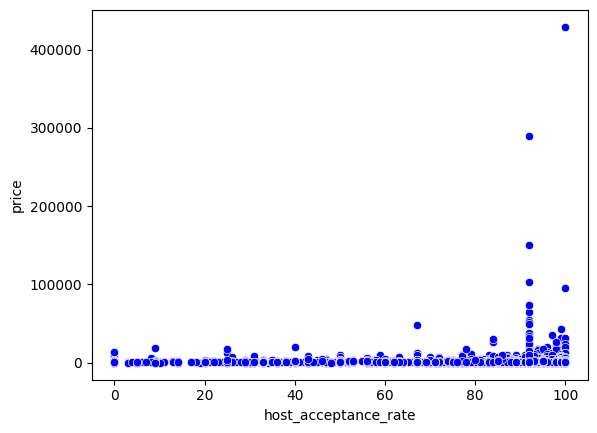

In [6]:
#Inprimimos el scatter plot entre la variable dependiente (total) e independiente (alcohol)
#para observar el comportamiento de su dispeción
from turtle import color 
sns.scatterplot(x='host_acceptance_rate', y='price', color="blue", data=df)

In [7]:
#Declaramos las variables dependientes e independedientes para la regresión lineal
Vars_Indep = df[['host_acceptance_rate']] #Los corchetes morados marcan una lista, simple o multiple (en las independientes)
Vars_Dep = df['price']

In [8]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [9]:
#Veerficamos la finción relacionada al modelo
type (model)

sklearn.linear_model._base.LinearRegression

In [10]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Vars_Dep)

LinearRegression()

In [11]:
#Verficamos los coeficientes obtenidos para el modelo ajuystadp 
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([5.08375493]),
 'rank_': 1,
 'singular_': array([2489.13483546]),
 'intercept_': 1203.2244632113363}

In [12]:
model.score(Vars_Indep,Vars_Dep)

0.0003999031808700204

In [13]:
#Predecimos los valores de total de accidentes a partir de la variable 'alcohol'
y_pred = model.predict(X=df[['host_acceptance_rate']])
y_pred

array([1670.92991722, 1676.01367216, 1492.9984945 , ..., 1670.92991722,
       1711.5999567 , 1711.5999567 ])

In [14]:
#Insertamos la columna de predicciones en el Dataframe
df.insert(0,'Predicciones', y_pred)
df

Predicciones                                       listing_url  \
0       1670.929917                https://www.airbnb.com/rooms/35797   
1       1676.013672                https://www.airbnb.com/rooms/44616   
2       1492.998495                https://www.airbnb.com/rooms/67703   
3       1711.599957                https://www.airbnb.com/rooms/70644   
4       1711.599957               https://www.airbnb.com/rooms/107078   
...             ...                                               ...   
17358   1670.929917  https://www.airbnb.com/rooms/1251627039124173262   
17359   1670.929917  https://www.airbnb.com/rooms/1251642490491185216   
17360   1670.929917  https://www.airbnb.com/rooms/1251769567383709085   
17361   1711.599957  https://www.airbnb.com/rooms/1251800961446133530   
17362   1711.599957  https://www.airbnb.com/rooms/1252229157495978163   

       host_since  host_response_time host_response_rate  \
0      2010-06-28  a few days or more                 0%   
1      2010-08-09      within an hour               100%   
2      2011-01-04      within an hour                71%   
3      2010-08-24  within a few hours               100%   
4      2011-04-27      within an hour               100%   
...           ...                 ...                ...   
17358  2024-09-22  a few days or more               100%   
17359  2024-09-18  a few days or more               100%   
17360  2020-11-24  a few days or more               100%   
17361  2019-01-20      within an hour               100%   
17362  2013-05-22      within an hour               100%   

       host_acceptance_rate host_is_superhost  \
0                      92.0                 f   
1                      93.0                 t   
2                      57.0                 t   
3                     100.0                 t   
4                     100.0                 t   
...                     ...               ...   
17358                  92.0                 f   
17359                  92.0                 f   
17360                  92.0                 f   
17361                 100.0                 t   
17362                 100.0                 t   

                     host_verifications neighbourhood_cleansed  \
0      ['email', 'phone', 'work_email']  Cuajimalpa de Morelos   
1      ['email', 'phone', 'work_email']             Cuauhtémoc   
2                    ['email', 'phone']             Cuauhtémoc   
3      ['email', 'phone', 'work_email']               Coyoacán   
4                    ['email', 'phone']         Miguel Hidalgo   
...                                 ...                    ...   
17358                ['email', 'phone']    Venustiano Carranza   
17359                ['email', 'phone']         Miguel Hidalgo   
17360                         ['phone']    Venustiano Carranza   
17361                ['email', 'phone']         Miguel Hidalgo   
17362                ['email', 'phone']         Miguel Hidalgo   

            property_type  ... review_scores_cleanliness  \
0            Entire villa  ...                      4.84   
1             Entire home  ...                      4.70   
2      Entire rental unit  ...                      4.75   
3      Entire rental unit  ...                      4.96   
4             Entire loft  ...                      5.00   
...                   ...  ...                       ...   
17358  Entire rental unit  ...                      4.84   
17359        Entire condo  ...                      4.84   
17360  Entire rental unit  ...                      4.84   
17361  Entire rental unit  ...                      4.84   
17362  Entire rental unit  ...                      4.84   

      review_scores_checkin review_scores_communication  \
0                      4.80                        4.80   
1                      4.87                        4.78   
2                      4.94                        4.92   
3                      4.96                        4.98   
4          

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

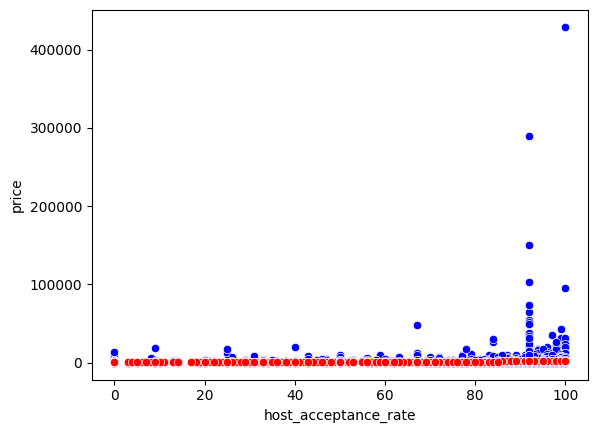

In [15]:
#Visualizamos la gráfica comparativa etre el total real y el total predecido 
sns.scatterplot(x='host_acceptance_rate', y='price', color="blue", data=df)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones', color="red", data=df)

In [16]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter = model.score(X=Vars_Indep, y=Vars_Dep)
coef_Deter

0.0003999031808700204

In [17]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

0.019997579375264907

**price vs host_is_superhost**

In [18]:
# Convertir los valores 'True' y 'False' a valores booleanos y luego a numéricos
df['host_is_superhost'] = df['host_is_superhost'].map({'t': True, 'f': False, 'Sin identificar': False}).astype(int)

<Axes: xlabel='host_is_superhost', ylabel='price'>

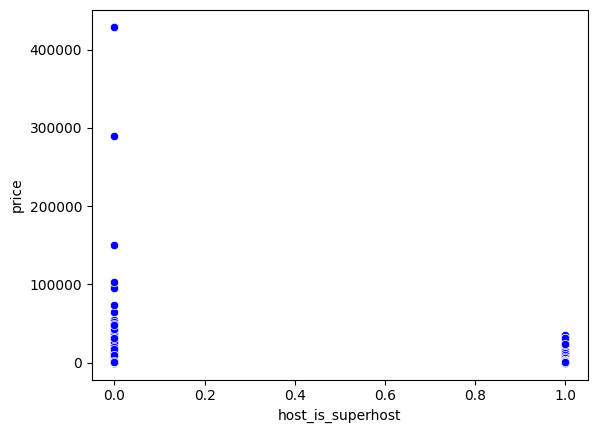

In [19]:
#Inprimimos el scatter plot entre la variable dependiente (total) e independiente (alcohol)
#para observar el comportamiento de su dispeción
from turtle import color 
sns.scatterplot(x='host_is_superhost', y='price', color="blue", data=df)

In [20]:
#Declaramos las variables dependientes e independedientes para la regresión lineal
Vars_Indep1 = df[['host_is_superhost']] #Los corchetes morados marcan una lista, simple o multiple (en las independientes)
Vars_Dep1 = df['price']

In [21]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()

In [22]:
#Verificamos la finción relacionada al modelo
type (model1)

sklearn.linear_model._base.LinearRegression

In [23]:
#Ajustamos el modelo con las variables antes declaradas
model1.fit(X=Vars_Indep1, y=Vars_Dep1)

LinearRegression()

In [24]:
#Verficamos los coeficientes obtenidos para el modelo ajuystadp 
model1.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_is_superhost'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([41.94788378]),
 'rank_': 1,
 'singular_': array([65.87105781]),
 'intercept_': 1652.586382113821}

In [25]:
model1.score(Vars_Indep1,Vars_Dep1)

1.906769456849755e-05

In [26]:
#Predecimos los valores de total de accidentes a partir de la variable 'alcohol'
y_pred1 = model1.predict(X=df[['host_is_superhost']])
y_pred1

array([1652.58638211, 1694.5342659 , 1694.5342659 , ..., 1652.58638211,
       1694.5342659 , 1694.5342659 ])

In [27]:
#Insertamos la columna de predicciones en el Dataframe
df.insert(0,'Predicciones1', y_pred1)
df

Predicciones1  Predicciones  \
0        1652.586382   1670.929917   
1        1694.534266   1676.013672   
2        1694.534266   1492.998495   
3        1694.534266   1711.599957   
4        1694.534266   1711.599957   
...              ...           ...   
17358    1652.586382   1670.929917   
17359    1652.586382   1670.929917   
17360    1652.586382   1670.929917   
17361    1694.534266   1711.599957   
17362    1694.534266   1711.599957   

                                            listing_url  host_since  \
0                    https://www.airbnb.com/rooms/35797  2010-06-28   
1                    https://www.airbnb.com/rooms/44616  2010-08-09   
2                    https://www.airbnb.com/rooms/67703  2011-01-04   
3                    https://www.airbnb.com/rooms/70644  2010-08-24   
4                   https://www.airbnb.com/rooms/107078  2011-04-27   
...                                                 ...         ...   
17358  https://www.airbnb.com/rooms/1251627039124173262  2024-09-22   
17359  https://www.airbnb.com/rooms/1251642490491185216  2024-09-18   
17360  https://www.airbnb.com/rooms/1251769567383709085  2020-11-24   
17361  https://www.airbnb.com/rooms/1251800961446133530  2019-01-20   
17362  https://www.airbnb.com/rooms/1252229157495978163  2013-05-22   

       host_response_time host_response_rate  host_acceptance_rate  \
0      a few days or more                 0%                  92.0   
1          within an hour               100%                  93.0   
2          within an hour                71%                  57.0   
3      within a few hours               100%                 100.0   
4          within an hour               100%                 100.0   
...                   ...                ...                   ...   
17358  a few days or more               100%                  92.0   
17359  a few days or more               100%                  92.0   
17360  a few days or more               100%                  92.0   
17361      within an hour               100%                 100.0   
17362      within an hour               100%                 100.0   

       host_is_superhost                host_verifications  \
0                      0  ['email', 'phone', 'work_email']   
1                      1  ['email', 'phone', 'work_email']   
2                      1                ['email', 'phone']   
3                      1  ['email', 'phone', 'work_email']   
4                      1                ['email', 'phone']   
...                  ...                               ...   
17358                  0                ['email', 'phone']   
17359                  0                ['email', 'phone']   
17360                  0                         ['phone']   
17361                  1                ['email', 'phone']   
17362                  1                ['email', 'phone']   

      neighbourhood_cleansed  ... review_scores_cleanliness  \
0      Cuajimalpa de Morelos  ...                      4.84   
1                 Cuauhtémoc  ...                      4.70   
2                 Cuauhtémoc  ...                      4.75   
3                   Coyoacán  ...                      4.96   
4             Miguel Hidalgo  ...                      5.00   
...                      ...  ...                       ...   
17358    Venustiano Carranza  ...                      4.84   
17359         Miguel Hidalgo  ...                      4.84   
17360    Venustiano Carranza  ...                      4.84   
17361         Miguel Hidalgo  ...                      4.84   
17362         Miguel Hidalgo  ...                      4.84   

      review_scores_checkin review_scores_communication  \
0                      4.80                        4.80   
1                      4.87                        4.78   
2                      4.94                        4.92   
3                      4.96                        4.98   
4                      5.00                        4.73   


<Axes: xlabel='host_is_superhost', ylabel='price'>

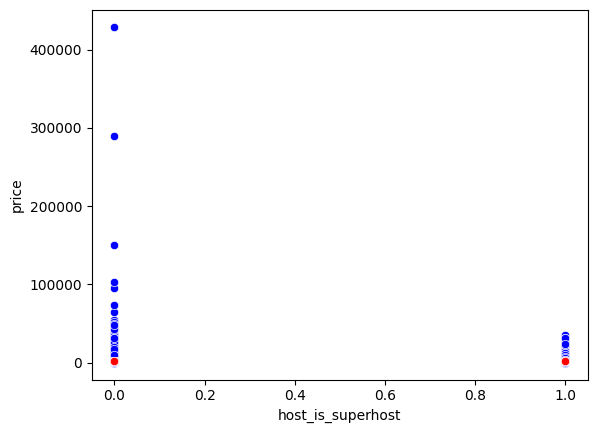

In [28]:
#Visualizamos la gráfica comparativa etre el total real y el total predecido 
sns.scatterplot(x='host_is_superhost', y='price', color="blue", data=df)
sns.scatterplot(x='host_is_superhost', y='Predicciones1', color="red", data=df)

In [29]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter1 = model1.score(X=Vars_Indep1, y=Vars_Dep1)
coef_Deter1

1.906769456849755e-05

In [30]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Correl1 = np.sqrt(coef_Deter1)
coef_Correl1

0.004366657138876093

**accommodates vs bathrooms**

<Axes: xlabel='bathrooms', ylabel='accommodates'>

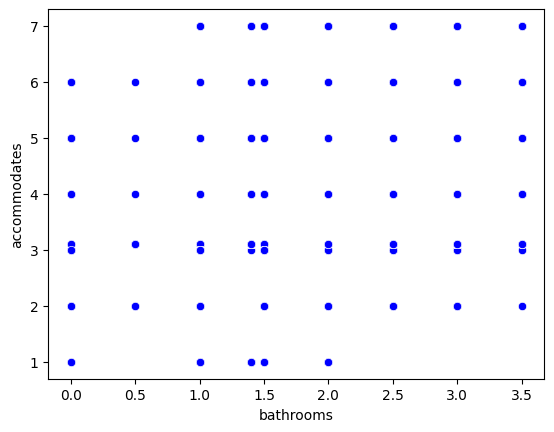

In [31]:
from turtle import color 
#la dependiente es la que intentas predecir 
sns.scatterplot(x='bathrooms', y='accommodates', color="blue", data=df)

In [32]:
#Declaramos las variables dependientes e independedientes para la regresión lineal
Vars_Indep2 = df[['bathrooms']] #Los corchetes morados marcan una lista, simple o multiple (en las independientes)
Vars_Dep2 = df['accommodates']

In [33]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()

In [34]:
#Veerficamos la finción relacionada al modelo
type (model2)

sklearn.linear_model._base.LinearRegression

In [35]:
#Ajustamos el modelo con las variables antes declaradas
model2.fit(X=Vars_Indep2, y=Vars_Dep2)

LinearRegression()

In [36]:
#Verficamos los coeficientes obtenidos para el modelo ajuystadp 
model2.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bathrooms'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.9968777]),
 'rank_': 1,
 'singular_': array([78.13623392]),
 'intercept_': 2.0875303476140177}

In [37]:
model2.score(Vars_Indep2,Vars_Dep2)

0.18381987148490297

In [38]:
#Predecimos los valores de total de accidentes a partir de la variable 'alcohol'
y_pred2 = model2.predict(X=df[['bathrooms']])
y_pred2

array([3.08440805, 3.08440805, 3.08440805, ..., 3.08440805, 3.08440805,
       3.08440805])

In [39]:
#Insertamos la columna de predicciones en el Dataframe
df.insert(0,'Predicciones2', y_pred2)
df

Predicciones2  Predicciones1  Predicciones  \
0           3.084408    1652.586382   1670.929917   
1           3.084408    1694.534266   1676.013672   
2           3.084408    1694.534266   1492.998495   
3           3.084408    1694.534266   1711.599957   
4           3.582847    1694.534266   1711.599957   
...              ...            ...           ...   
17358       3.084408    1652.586382   1670.929917   
17359       4.081286    1652.586382   1670.929917   
17360       3.084408    1652.586382   1670.929917   
17361       3.084408    1694.534266   1711.599957   
17362       3.084408    1694.534266   1711.599957   

                                            listing_url  host_since  \
0                    https://www.airbnb.com/rooms/35797  2010-06-28   
1                    https://www.airbnb.com/rooms/44616  2010-08-09   
2                    https://www.airbnb.com/rooms/67703  2011-01-04   
3                    https://www.airbnb.com/rooms/70644  2010-08-24   
4                   https://www.airbnb.com/rooms/107078  2011-04-27   
...                                                 ...         ...   
17358  https://www.airbnb.com/rooms/1251627039124173262  2024-09-22   
17359  https://www.airbnb.com/rooms/1251642490491185216  2024-09-18   
17360  https://www.airbnb.com/rooms/1251769567383709085  2020-11-24   
17361  https://www.airbnb.com/rooms/1251800961446133530  2019-01-20   
17362  https://www.airbnb.com/rooms/1252229157495978163  2013-05-22   

       host_response_time host_response_rate  host_acceptance_rate  \
0      a few days or more                 0%                  92.0   
1          within an hour               100%                  93.0   
2          within an hour                71%                  57.0   
3      within a few hours               100%                 100.0   
4          within an hour               100%                 100.0   
...                   ...                ...                   ...   
17358  a few days or more               100%                  92.0   
17359  a few days or more               100%                  92.0   
17360  a few days or more               100%                  92.0   
17361      within an hour               100%                 100.0   
17362      within an hour               100%                 100.0   

       host_is_superhost                host_verifications  ...  \
0                      0  ['email', 'phone', 'work_email']  ...   
1                      1  ['email', 'phone', 'work_email']  ...   
2                      1                ['email', 'phone']  ...   
3                      1  ['email', 'phone', 'work_email']  ...   
4                      1                ['email', 'phone']  ...   
...                  ...                               ...  ...   
17358                  0                ['email', 'phone']  ...   
17359                  0                ['email', 'phone']  ...   
17360                  0                         ['phone']  ...   
17361                  1                ['email', 'phone']  ...   
17362                  1                ['email', 'phone']  ...   

      review_scores_cleanliness review_scores_checkin  \
0                          4.84                  4.80   
1                          4.70                  4.87   
2                          4.75                  4.94   
3                          4.96                  4.96   
4                          5.00                  5.00   
...                         ...                   ...   
17358                      4.84                  4.80   
17359                      4.84                  4.80   
17360                      4.84                  4.80   
17361                      4.84                  4.80   
17362                      4.84                  4.80   

      review_scores_communication review_scores_location review_scores_value  \
0                            4.80                   4.80                4.70   
1                         

<Axes: xlabel='bathrooms', ylabel='accommodates'>

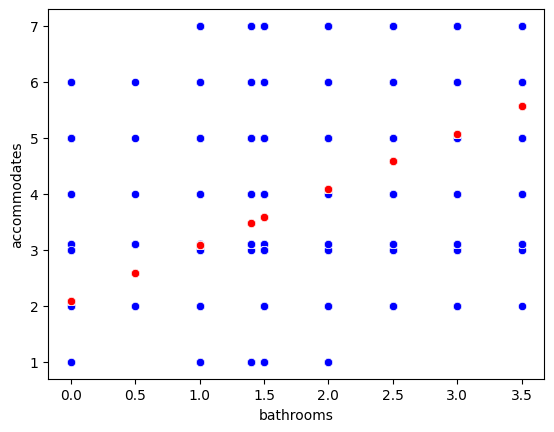

In [40]:
#Visualizamos la gráfica comparativa etre el total real y el total predecido 
sns.scatterplot(x='bathrooms', y='accommodates', color="blue", data=df)
sns.scatterplot(x='bathrooms', y='Predicciones2', color="red", data=df)

In [41]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter2 = model2.score(X=Vars_Indep2, y=Vars_Dep2)
coef_Deter2

0.18381987148490297

In [42]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Correl2 = np.sqrt(coef_Deter2)
coef_Correl2

0.42874219699593713

**price vs review_scores_cleanliness**

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

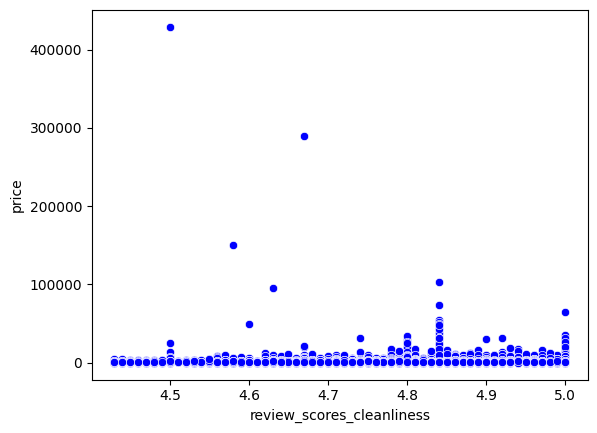

In [43]:
from turtle import color 
#la dependiente es la que intentas predecir 
sns.scatterplot(x='review_scores_cleanliness', y='price', color="blue", data=df)

In [44]:
#Declaramos las variables dependientes e independedientes para la regresión lineal
Vars_Indep3 = df[['review_scores_cleanliness']] #Los corchetes morados marcan una lista, simple o multiple (en las independientes)
Vars_Dep3 = df['price']

In [45]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model3 = LinearRegression()

In [46]:
#Veerficamos la finción relacionada al modelo
type (model3)

sklearn.linear_model._base.LinearRegression

In [47]:
#Ajustamos el modelo con las variables antes declaradas
model3.fit(X=Vars_Indep3, y=Vars_Dep3)

LinearRegression()

In [48]:
#Verficamos los coeficientes obtenidos para el modelo ajuystadp 
model3.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([316.0948515]),
 'rank_': 1,
 'singular_': array([17.16684438]),
 'intercept_': 143.1655673449277}

In [49]:
model3.score(Vars_Indep3,Vars_Dep3)

7.353677568811001e-05

In [50]:
#Predecimos los valores de total de accidentes a partir de la variable 'alcohol'
y_pred3 = model3.predict(X=df[['review_scores_cleanliness']])
y_pred3

array([1673.06464862, 1628.81136941, 1644.61611198, ..., 1673.06464862,
       1673.06464862, 1673.06464862])

In [51]:
#Insertamos la columna de predicciones en el Dataframe
df.insert(0,'Predicciones3', y_pred3)
df

Predicciones3  Predicciones2  Predicciones1  Predicciones  \
0        1673.064649       3.084408    1652.586382   1670.929917   
1        1628.811369       3.084408    1694.534266   1676.013672   
2        1644.616112       3.084408    1694.534266   1492.998495   
3        1710.996031       3.084408    1694.534266   1711.599957   
4        1723.639825       3.582847    1694.534266   1711.599957   
...              ...            ...            ...           ...   
17358    1673.064649       3.084408    1652.586382   1670.929917   
17359    1673.064649       4.081286    1652.586382   1670.929917   
17360    1673.064649       3.084408    1652.586382   1670.929917   
17361    1673.064649       3.084408    1694.534266   1711.599957   
17362    1673.064649       3.084408    1694.534266   1711.599957   

                                            listing_url  host_since  \
0                    https://www.airbnb.com/rooms/35797  2010-06-28   
1                    https://www.airbnb.com/rooms/44616  2010-08-09   
2                    https://www.airbnb.com/rooms/67703  2011-01-04   
3                    https://www.airbnb.com/rooms/70644  2010-08-24   
4                   https://www.airbnb.com/rooms/107078  2011-04-27   
...                                                 ...         ...   
17358  https://www.airbnb.com/rooms/1251627039124173262  2024-09-22   
17359  https://www.airbnb.com/rooms/1251642490491185216  2024-09-18   
17360  https://www.airbnb.com/rooms/1251769567383709085  2020-11-24   
17361  https://www.airbnb.com/rooms/1251800961446133530  2019-01-20   
17362  https://www.airbnb.com/rooms/1252229157495978163  2013-05-22   

       host_response_time host_response_rate  host_acceptance_rate  \
0      a few days or more                 0%                  92.0   
1          within an hour               100%                  93.0   
2          within an hour                71%                  57.0   
3      within a few hours               100%                 100.0   
4          within an hour               100%                 100.0   
...                   ...                ...                   ...   
17358  a few days or more               100%                  92.0   
17359  a few days or more               100%                  92.0   
17360  a few days or more               100%                  92.0   
17361      within an hour               100%                 100.0   
17362      within an hour               100%                 100.0   

       host_is_superhost  ... review_scores_cleanliness review_scores_checkin  \
0                      0  ...                      4.84                  4.80   
1                      1  ...                      4.70                  4.87   
2                      1  ...                      4.75                  4.94   
3                      1  ...                      4.96                  4.96   
4                      1  ...                      5.00                  5.00   
...                  ...  ...                       ...                   ...   
17358                  0  ...                      4.84                  4.80   
17359                  0  ...                      4.84                  4.80   
17360                  0  ...                      4.84                  4.80   
17361                  1  ...                      4.84                  4.80   
17362                  1  ...                      4.84                  4.80   

      review_scores_communication review_scores_location review_scores_value  \
0                            4.80                   4.80                4.70   
1                            4.78                   4.98                4.48   
2                            4.92                   4.98                4.91   
3                            4.98                   4.96                4.92   
4                            4.73                   4.91                4.82   
...                           ...          

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

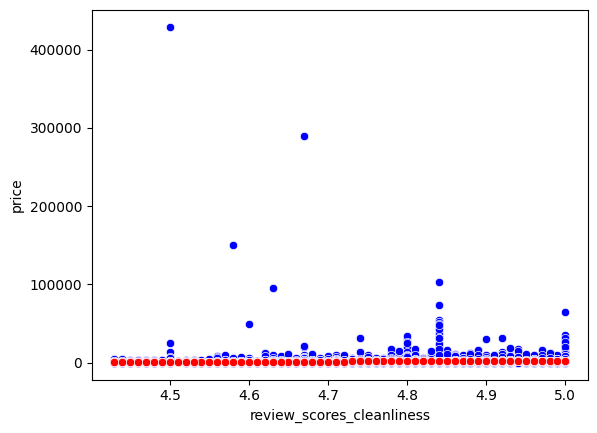

In [52]:
#Visualizamos la gráfica comparativa etre el total real y el total predecido 
sns.scatterplot(x='review_scores_cleanliness', y='price', color="blue", data=df)
sns.scatterplot(x='review_scores_cleanliness', y='Predicciones3', color="red", data=df)

In [53]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter3 = model3.score(X=Vars_Indep3, y=Vars_Dep3)
coef_Deter3

7.353677568811001e-05

In [54]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Correl3 = np.sqrt(coef_Deter3)
coef_Correl3

0.008575358633206544

**price vs instant_bookable**

In [55]:
# Convertir los valores 'True' y 'False' a valores booleanos y luego a numéricos
df['instant_bookable'] = df['instant_bookable'].map({'t': True, 'f': False}).astype(int)

<Axes: xlabel='instant_bookable', ylabel='price'>

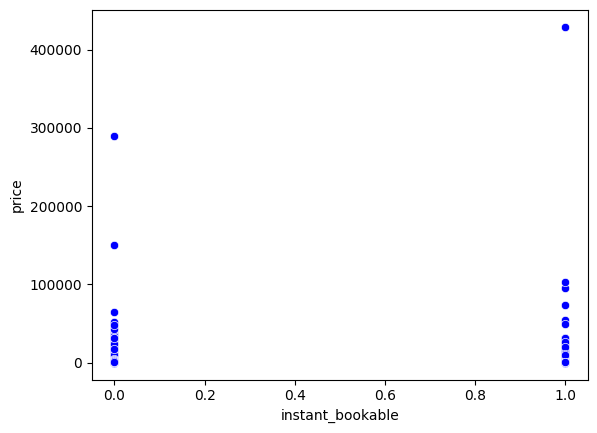

In [56]:
from turtle import color 
#la dependiente es la que intentas predecir 
sns.scatterplot(x='instant_bookable', y='price', color="blue", data=df)

In [57]:
#Declaramos las variables dependientes e independedientes para la regresión lineal
Vars_Indep5 = df[['instant_bookable']] #Los corchetes morados marcan una lista, simple o multiple (en las independientes)
Vars_Dep5 = df['price']

In [58]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model5 = LinearRegression()

In [59]:
#Veerficamos la finción relacionada al modelo
type (model5)

sklearn.linear_model._base.LinearRegression

In [60]:
#Ajustamos el modelo con las variables antes declaradas
model5.fit(X=Vars_Indep5, y=Vars_Dep5)

LinearRegression()

In [61]:
#Verficamos los coeficientes obtenidos para el modelo ajuystadp 
model5.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['instant_bookable'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([275.62065358]),
 'rank_': 1,
 'singular_': array([65.05823086]),
 'intercept_': 1557.0837644249877}

In [62]:
model5.score(Vars_Indep5,Vars_Dep5)

0.000803002345810766

In [63]:
#Predecimos los valores de total de accidentes a partir de la variable 'alcohol'
y_pred5 = model5.predict(X=df[['instant_bookable']])
y_pred5

array([1557.08376442, 1557.08376442, 1557.08376442, ..., 1557.08376442,
       1832.704418  , 1832.704418  ])

In [64]:
#Insertamos la columna de predicciones en el Dataframe
df.insert(0,'Predicciones5', y_pred5)
df

Predicciones5  Predicciones3  Predicciones2  Predicciones1  \
0        1557.083764    1673.064649       3.084408    1652.586382   
1        1557.083764    1628.811369       3.084408    1694.534266   
2        1557.083764    1644.616112       3.084408    1694.534266   
3        1557.083764    1710.996031       3.084408    1694.534266   
4        1557.083764    1723.639825       3.582847    1694.534266   
...              ...            ...            ...            ...   
17358    1557.083764    1673.064649       3.084408    1652.586382   
17359    1557.083764    1673.064649       4.081286    1652.586382   
17360    1557.083764    1673.064649       3.084408    1652.586382   
17361    1832.704418    1673.064649       3.084408    1694.534266   
17362    1832.704418    1673.064649       3.084408    1694.534266   

       Predicciones                                       listing_url  \
0       1670.929917                https://www.airbnb.com/rooms/35797   
1       1676.013672                https://www.airbnb.com/rooms/44616   
2       1492.998495                https://www.airbnb.com/rooms/67703   
3       1711.599957                https://www.airbnb.com/rooms/70644   
4       1711.599957               https://www.airbnb.com/rooms/107078   
...             ...                                               ...   
17358   1670.929917  https://www.airbnb.com/rooms/1251627039124173262   
17359   1670.929917  https://www.airbnb.com/rooms/1251642490491185216   
17360   1670.929917  https://www.airbnb.com/rooms/1251769567383709085   
17361   1711.599957  https://www.airbnb.com/rooms/1251800961446133530   
17362   1711.599957  https://www.airbnb.com/rooms/1252229157495978163   

       host_since  host_response_time host_response_rate  \
0      2010-06-28  a few days or more                 0%   
1      2010-08-09      within an hour               100%   
2      2011-01-04      within an hour                71%   
3      2010-08-24  within a few hours               100%   
4      2011-04-27      within an hour               100%   
...           ...                 ...                ...   
17358  2024-09-22  a few days or more               100%   
17359  2024-09-18  a few days or more               100%   
17360  2020-11-24  a few days or more               100%   
17361  2019-01-20      within an hour               100%   
17362  2013-05-22      within an hour               100%   

       host_acceptance_rate  ...  review_scores_cleanliness  \
0                      92.0  ...                       4.84   
1                      93.0  ...                       4.70   
2                      57.0  ...                       4.75   
3                     100.0  ...                       4.96   
4                     100.0  ...                       5.00   
...                     ...  ...                        ...   
17358                  92.0  ...                       4.84   
17359                  92.0  ...                       4.84   
17360                  92.0  ...                       4.84   
17361                 100.0  ...                       4.84   
17362                 100.0  ...                       4.84   

      review_scores_checkin review_scores_communication  \
0                      4.80                        4.80   
1                      4.87                        4.78   
2                      4.94                        4.92   
3                      4.96                        4.98   
4                      5.00                        4.73   
...                     ...                         ...   
17358                  4.80                        4.80   
17359                  4.80                        4.80   
17360                  4.80                        4.80   
17361                  4.80                        4.80   
17362                  4.80                        4.80   

      review_scores_location review_scores_value  \
0                       4.80                4.70   
1         

<Axes: xlabel='instant_bookable', ylabel='price'>

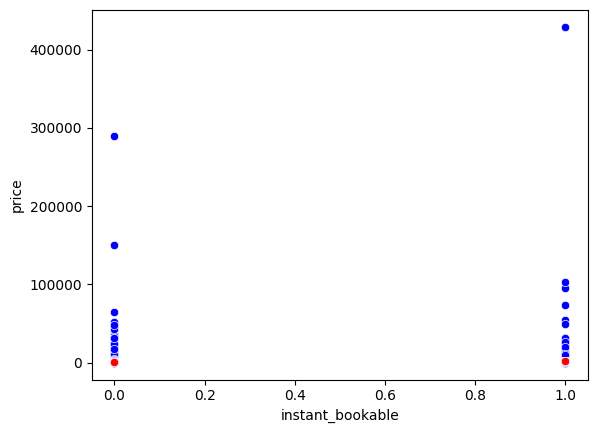

In [65]:
#Visualizamos la gráfica comparativa etre el total real y el total predecido 
sns.scatterplot(x='instant_bookable', y='price', color="blue", data=df)
sns.scatterplot(x='instant_bookable', y='Predicciones5', color="red", data=df)

In [66]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter5 = model5.score(X=Vars_Indep5, y=Vars_Dep5)
coef_Deter5

0.000803002345810766

In [67]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Correl5 = np.sqrt(coef_Deter5)
coef_Correl5

0.028337296021511405

**price vs property_type**

In [69]:
tipos_habitacion = df['property_type'].unique()
tipos_habitacion

array(['Entire villa', 'Entire home', 'Entire rental unit', 'Entire loft',
       'Entire condo', 'Entire guest suite', 'Entire serviced apartment',
       'Tiny home', 'Entire guesthouse', 'Entire bungalow',
       'Casa particular', 'Entire townhouse', 'Entire cabin',
       'Room in aparthotel', 'Entire place', 'Earthen home',
       'Entire hostel', 'Entire cottage', 'Entire chalet',
       'Entire in-law', 'Holiday park', 'Campsite', 'Castle', 'Farm stay',
       'Hut', 'Entire home/apt', 'Entire vacation home',
       'Shipping container', 'Dome', 'Tent', 'Boat', 'Tower',
       'Room in hotel'], dtype=object)

In [70]:
# Crear un diccionario de mapeo basado en los nuevos tipos de habitación proporcionados
tipo_a_numero = {
    'Entire villa': 1,
    'Entire home': 2,
    'Entire rental unit': 3,
    'Entire loft': 4,
    'Entire condo': 5,
    'Entire guest suite': 6,
    'Entire serviced apartment': 7,
    'Tiny home': 8,
    'Entire guesthouse': 9,
    'Entire bungalow': 10,
    'Casa particular': 11,
    'Entire townhouse': 12,
    'Entire cabin': 13,
    'Room in aparthotel': 14,
    'Entire place': 15,
    'Earthen home': 16,
    'Entire hostel': 17,
    'Entire cottage': 18,
    'Entire chalet': 19,
    'Entire in-law': 20,
    'Holiday park': 21,
    'Campsite': 22,
    'Castle': 23,
    'Farm stay': 24,
    'Hut': 25,
    'Entire home/apt': 26,
    'Entire vacation home': 27,
    'Shipping container': 28,
    'Dome': 29,
    'Tent': 30,
    'Boat': 31,
    'Tower': 32,
    'Room in hotel': 33
}

# Aplicar el mapeo a la columna 'property_type'
df['property_type_numerico'] = df['property_type'].map(tipo_a_numero)

<Axes: xlabel='property_type_numerico', ylabel='price'>

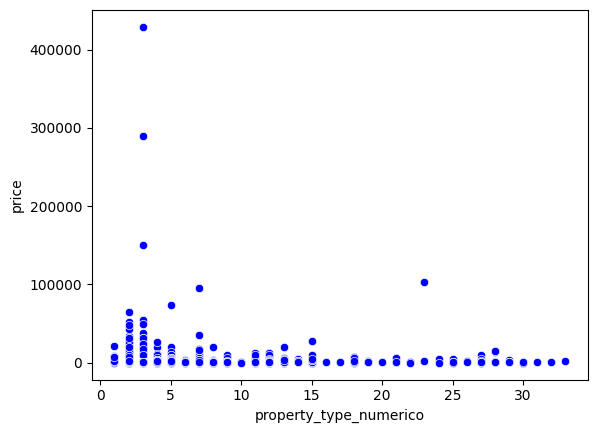

In [71]:
from turtle import color 
#la dependiente es la que intentas predecir 
sns.scatterplot(x='property_type_numerico', y='price', color="blue", data=df)

In [72]:
#Declaramos las variables dependientes e independedientes para la regresión lineal
Vars_Indep6 = df[['property_type_numerico']] #Los corchetes morados marcan una lista, simple o multiple (en las independientes)
Vars_Dep6 = df['price']

In [73]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model6 = LinearRegression()

In [74]:
#Veerficamos la finción relacionada al modelo
type (model6)

sklearn.linear_model._base.LinearRegression

In [75]:
#Ajustamos el modelo con las variables antes declaradas
model6.fit(X=Vars_Indep6, y=Vars_Dep6)

LinearRegression()

In [76]:
#Verficamos los coeficientes obtenidos para el modelo ajuystadp 
model6.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['property_type_numerico'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-26.35977164]),
 'rank_': 1,
 'singular_': array([365.11523784]),
 'intercept_': 1780.4315003612896}

In [77]:
model6.score(Vars_Indep6,Vars_Dep6)

0.0002313300238121485

In [78]:
#Predecimos los valores de total de accidentes a partir de la variable 'alcohol'
y_pred6 = model6.predict(X=df[['property_type_numerico']])
y_pred6

array([1754.07172873, 1727.71195709, 1701.35218546, ..., 1701.35218546,
       1701.35218546, 1701.35218546])

In [79]:
#Insertamos la columna de predicciones en el Dataframe
df.insert(0,'Predicciones6', y_pred6)
df

Predicciones6  Predicciones5  Predicciones3  Predicciones2  \
0        1754.071729    1557.083764    1673.064649       3.084408   
1        1727.711957    1557.083764    1628.811369       3.084408   
2        1701.352185    1557.083764    1644.616112       3.084408   
3        1701.352185    1557.083764    1710.996031       3.084408   
4        1674.992414    1557.083764    1723.639825       3.582847   
...              ...            ...            ...            ...   
17358    1701.352185    1557.083764    1673.064649       3.084408   
17359    1648.632642    1557.083764    1673.064649       4.081286   
17360    1701.352185    1557.083764    1673.064649       3.084408   
17361    1701.352185    1832.704418    1673.064649       3.084408   
17362    1701.352185    1832.704418    1673.064649       3.084408   

       Predicciones1  Predicciones  \
0        1652.586382   1670.929917   
1        1694.534266   1676.013672   
2        1694.534266   1492.998495   
3        1694.534266   1711.599957   
4        1694.534266   1711.599957   
...              ...           ...   
17358    1652.586382   1670.929917   
17359    1652.586382   1670.929917   
17360    1652.586382   1670.929917   
17361    1694.534266   1711.599957   
17362    1694.534266   1711.599957   

                                            listing_url  host_since  \
0                    https://www.airbnb.com/rooms/35797  2010-06-28   
1                    https://www.airbnb.com/rooms/44616  2010-08-09   
2                    https://www.airbnb.com/rooms/67703  2011-01-04   
3                    https://www.airbnb.com/rooms/70644  2010-08-24   
4                   https://www.airbnb.com/rooms/107078  2011-04-27   
...                                                 ...         ...   
17358  https://www.airbnb.com/rooms/1251627039124173262  2024-09-22   
17359  https://www.airbnb.com/rooms/1251642490491185216  2024-09-18   
17360  https://www.airbnb.com/rooms/1251769567383709085  2020-11-24   
17361  https://www.airbnb.com/rooms/1251800961446133530  2019-01-20   
17362  https://www.airbnb.com/rooms/1252229157495978163  2013-05-22   

       host_response_time host_response_rate  ...  review_scores_checkin  \
0      a few days or more                 0%  ...                   4.80   
1          within an hour               100%  ...                   4.87   
2          within an hour                71%  ...                   4.94   
3      within a few hours               100%  ...                   4.96   
4          within an hour               100%  ...                   5.00   
...                   ...                ...  ...                    ...   
17358  a few days or more               100%  ...                   4.80   
17359  a few days or more               100%  ...                   4.80   
17360  a few days or more               100%  ...                   4.80   
17361      within an hour               100%  ...                   4.80   
17362      within an hour               100%  ...                   4.80   

       review_scores_communication review_scores_location review_scores_value  \
0                             4.80                   4.80                4.70   
1                             4.78                   4.98                4.48   
2                             4.92                   4.98                4.91   
3                             4.98                   4.96                4.92   
4                             4.73                   4.91                4.82   
...                            ...                    ...                 ...   
17358                         4.80                   4.80                4.70   
17359                         4.80                   4.80                4.70   
17360                         4.80                   4.80                4.70   
17361                         4.80                   4.80                4.70   
17362                         4.80                   4.80       

<Axes: xlabel='property_type_numerico', ylabel='price'>

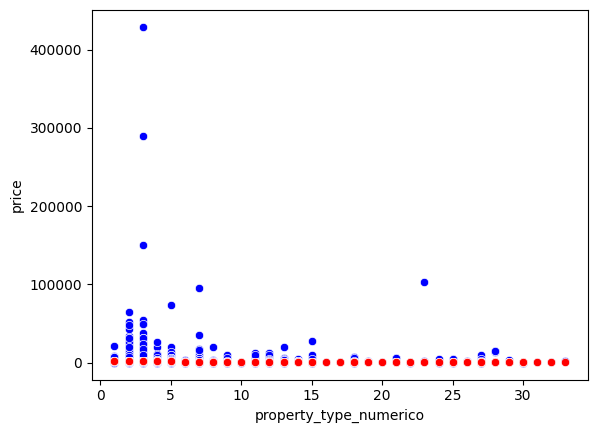

In [80]:
#Visualizamos la gráfica comparativa etre el total real y el total predecido 
sns.scatterplot(x='property_type_numerico', y='price', color="blue", data=df)
sns.scatterplot(x='property_type_numerico', y='Predicciones6', color="red", data=df)

In [81]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter6 = model6.score(X=Vars_Indep6, y=Vars_Dep6)
coef_Deter6

0.0002313300238121485

In [82]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Correl6 = np.sqrt(coef_Deter6)
coef_Correl6

0.015209537264892332

**Mapa de calor**

In [83]:
# Utilizar el método select_dtypes para seleccionar solo columnas numéricas
df_numerico = df.select_dtypes(include=['number'])
df_numerico

Predicciones6  Predicciones5  Predicciones3  Predicciones2  \
0        1754.071729    1557.083764    1673.064649       3.084408   
1        1727.711957    1557.083764    1628.811369       3.084408   
2        1701.352185    1557.083764    1644.616112       3.084408   
3        1701.352185    1557.083764    1710.996031       3.084408   
4        1674.992414    1557.083764    1723.639825       3.582847   
...              ...            ...            ...            ...   
17358    1701.352185    1557.083764    1673.064649       3.084408   
17359    1648.632642    1557.083764    1673.064649       4.081286   
17360    1701.352185    1557.083764    1673.064649       3.084408   
17361    1701.352185    1832.704418    1673.064649       3.084408   
17362    1701.352185    1832.704418    1673.064649       3.084408   

       Predicciones1  Predicciones  host_acceptance_rate  host_is_superhost  \
0        1652.586382   1670.929917                  92.0                  0   
1        1694.534266   1676.013672                  93.0                  1   
2        1694.534266   1492.998495                  57.0                  1   
3        1694.534266   1711.599957                 100.0                  1   
4        1694.534266   1711.599957                 100.0                  1   
...              ...           ...                   ...                ...   
17358    1652.586382   1670.929917                  92.0                  0   
17359    1652.586382   1670.929917                  92.0                  0   
17360    1652.586382   1670.929917                  92.0                  0   
17361    1694.534266   1711.599957                 100.0                  1   
17362    1694.534266   1711.599957                 100.0                  1   

        price  instant_bookable  ...  review_scores_checkin  \
0      3865.0                 0  ...                   4.80   
1       120.0                 0  ...                   4.87   
2      2029.0                 0  ...                   4.94   
3      1140.0                 0  ...                   4.96   
4      3633.0                 0  ...                   5.00   
...       ...               ...  ...                    ...   
17358   700.0                 0  ...                   4.80   
17359  1900.0                 0  ...                   4.80   
17360  1200.0                 0  ...                   4.80   
17361  1358.0                 1  ...                   4.80   
17362  1353.0                 1  ...                   4.80   

       review_scores_communication  review_scores_location  \
0                             4.80                    4.80   
1                             4.78                    4.98   
2                             4.92                    4.98   
3                             4.98                    4.96   
4                             4.73                    4.91   
...                            ...                     ...   
17358                         4.80                    4.80   
17359                         4.80                    4.80   
17360                         4.80                    4.80   
17361                         4.80                    4.80   
17362                         4.80                    4.80   

       review_scores_value  calculated_host_listings_count  \
0                     4.70                             1.0   
1                     4.48                             8.0   
2                     4.91                             2.0   
3                     4.92                             3.0   
4                     4.82                             3.0   
...                    ...                             ...   
17358                 4.70                             1.0   
17359                 4.70                             1.0   
17360                 4.70                             1.0   
17361                 4.70                             6.0   
17362                 4.70                   

In [84]:
#Encontramos todas las correlaciones entre las variables
Corr_Factors = df_numerico.corr()
Corr_Factors

Predicciones6  Predicciones5  \
Predicciones6                                      1.000000       0.030863   
Predicciones5                                      0.030863       1.000000   
Predicciones3                                      0.003350      -0.070747   
Predicciones2                                      0.039208       0.014335   
Predicciones1                                     -0.034917       0.061598   
Predicciones                                      -0.020495       0.269605   
host_acceptance_rate                              -0.020495       0.269605   
host_is_superhost                                 -0.034917       0.061598   
price                                              0.015210       0.028337   
instant_bookable                                   0.030863       1.000000   
id                                                 0.058249       0.199933   
host_id                                           -0.016855       0.153013   
host_listings_count                                0.025440       0.347555   
host_total_listings_count                          0.032149       0.343836   
latitude                                          -0.043822       0.093044   
longitude                                          0.039735      -0.000630   
accommodates                                       0.047063      -0.008144   
bathrooms                                          0.039208       0.014335   
bedrooms                                           0.052551      -0.062756   
beds                                               0.040701      -0.049985   
minimum_nights                                     0.049288      -0.259608   
maximum_nights                                     0.000137       0.046957   
minimum_nights_avg_ntm                             0.052783      -0.209055   
maximum_nights_avg_ntm                            -0.001772       0.126654   
availability_30                                   -0.021380       0.082484   
availability_60                                   -0.028047       0.104260   
availability_90                                   -0.027837       0.107600   
availability_365                                  -0.036361       0.177564   
number_of_reviews                                 -0.054023       0.022418   
number_of_reviews_ltm                             -0.046497       0.103407   
number_of_reviews_l30d                            -0.010934       0.109797   
review_scores_rating                              -0.008915      -0.132638   
review_scores_accuracy                            -0.007560      -0.129016   
review_scores_cleanliness                          0.003350      -0.070747   
review_scores_checkin                             -0.002237      -0.087094   
review_scores_communication                       -0.014240      -0.119196   
review_scores_location                             0.072654       0.005521   
review_scores_value                               -0.010738      -0.104304   
calculated_host_listings_count                     0.009028       0.314423   
calculated_host_listings_count_entire_homes        0.015738       0.326605   
calculated_host_listings_count_private_rooms       0.007853       0.071595   
calculated_host_listings_count_shared_rooms       -0.002799       0.043340   
reviews_per_month                                 -0.024572       0.149244   
property_type_numerico                            -1.000000      -0.030863   

                                              Predicciones3  Predicciones2  \
Predicciones6                                      0.003350       0.039208   
Predicciones5                                     -0.070747       0.014335   
Predicciones3                                      1.000000       0.031091   
Predicciones2                                      0.031091       1.000000   
Predicciones1                                      0.165623       0.071665   
Predicciones                                      -0.004000       0

In [85]:
#Encontramos el valor absoluto de todas las correlaciones entre las  variables
Corr_Factors1 = abs(Corr_Factors)
Corr_Factors1

Predicciones6  Predicciones5  \
Predicciones6                                      1.000000       0.030863   
Predicciones5                                      0.030863       1.000000   
Predicciones3                                      0.003350       0.070747   
Predicciones2                                      0.039208       0.014335   
Predicciones1                                      0.034917       0.061598   
Predicciones                                       0.020495       0.269605   
host_acceptance_rate                               0.020495       0.269605   
host_is_superhost                                  0.034917       0.061598   
price                                              0.015210       0.028337   
instant_bookable                                   0.030863       1.000000   
id                                                 0.058249       0.199933   
host_id                                            0.016855       0.153013   
host_listings_count                                0.025440       0.347555   
host_total_listings_count                          0.032149       0.343836   
latitude                                           0.043822       0.093044   
longitude                                          0.039735       0.000630   
accommodates                                       0.047063       0.008144   
bathrooms                                          0.039208       0.014335   
bedrooms                                           0.052551       0.062756   
beds                                               0.040701       0.049985   
minimum_nights                                     0.049288       0.259608   
maximum_nights                                     0.000137       0.046957   
minimum_nights_avg_ntm                             0.052783       0.209055   
maximum_nights_avg_ntm                             0.001772       0.126654   
availability_30                                    0.021380       0.082484   
availability_60                                    0.028047       0.104260   
availability_90                                    0.027837       0.107600   
availability_365                                   0.036361       0.177564   
number_of_reviews                                  0.054023       0.022418   
number_of_reviews_ltm                              0.046497       0.103407   
number_of_reviews_l30d                             0.010934       0.109797   
review_scores_rating                               0.008915       0.132638   
review_scores_accuracy                             0.007560       0.129016   
review_scores_cleanliness                          0.003350       0.070747   
review_scores_checkin                              0.002237       0.087094   
review_scores_communication                        0.014240       0.119196   
review_scores_location                             0.072654       0.005521   
review_scores_value                                0.010738       0.104304   
calculated_host_listings_count                     0.009028       0.314423   
calculated_host_listings_count_entire_homes        0.015738       0.326605   
calculated_host_listings_count_private_rooms       0.007853       0.071595   
calculated_host_listings_count_shared_rooms        0.002799       0.043340   
reviews_per_month                                  0.024572       0.149244   
property_type_numerico                             1.000000       0.030863   

                                              Predicciones3  Predicciones2  \
Predicciones6                                      0.003350       0.039208   
Predicciones5                                      0.070747       0.014335   
Predicciones3                                      1.000000       0.031091   
Predicciones2                                      0.031091       1.000000   
Predicciones1                                      0.165623       0.071665   
Predicciones                                       0.004000       0

<Axes: >

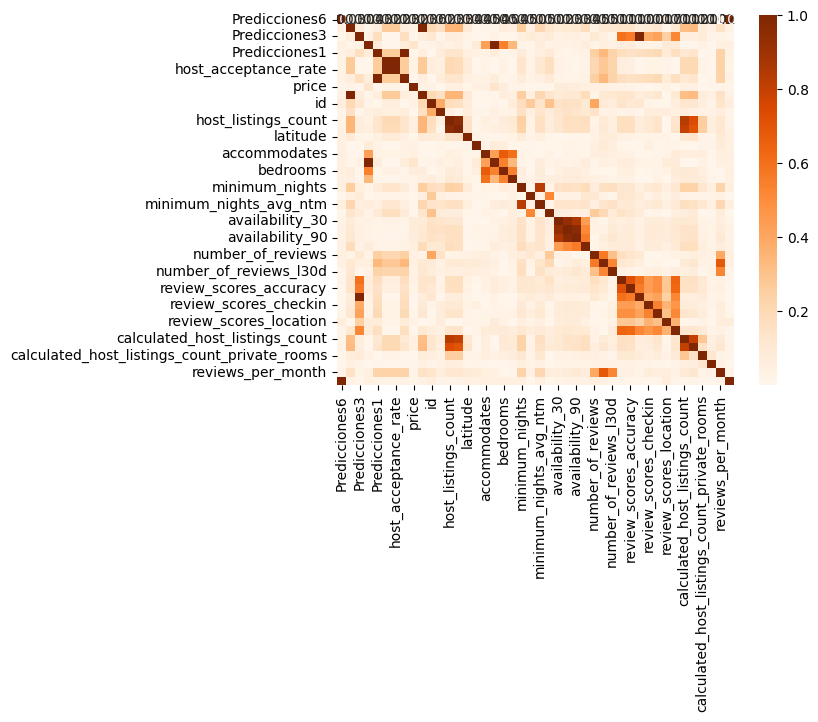

In [86]:
#
Heat_Map = sns.heatmap(Corr_Factors1, cmap='Oranges', annot=True, fmt=".2f")
Heat_Map

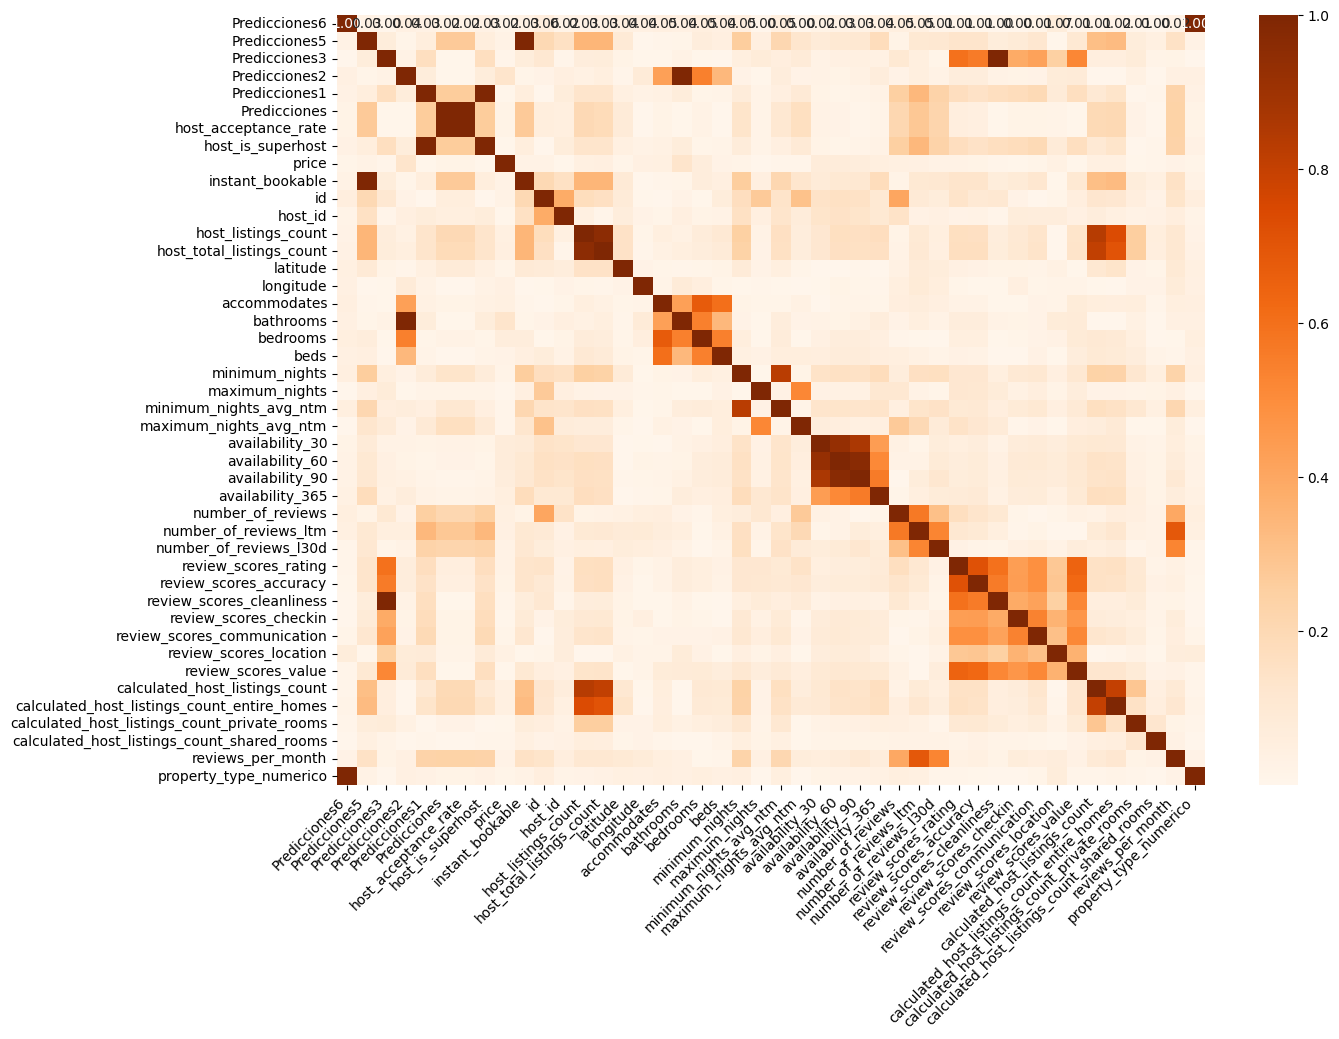

In [87]:
# # Crear la figura y el mapa de calor
plt.figure(figsize=(14, 10))  # Ajusta el tamaño de la figura según sea necesario
Heat_Map = sns.heatmap(Corr_Factors1, cmap='Oranges', annot=True, fmt=".2f", annot_kws={"size": 10})

# # Ajusta las etiquetas de los ejes si es necesario
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# # Mostrar el mapa de calor
plt.show()

# # Crear la figura y el mapa de calor
# plt.figure(figsize=(20, 15))  # Aumenta el tamaño de la figura
# Heat_Map = sns.heatmap(Corr_Factors1, cmap='Oranges', annot=True, fmt=".2f", annot_kws={"size": 10})

# # Ajusta las etiquetas de los ejes si es necesario
# plt.xticks(rotation=45, ha='right')
# plt.yticks(rotation=0)

# # Mostrar el mapa de calor
# plt.show()